In [21]:
from sklearn import manifold, datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_f = pd.read_csv("./data/train/feature.csv")
train_l = pd.read_csv("./data/train/label.csv")
train = pd.merge(train_f, train_l)
train

,APPLICATION_ID,v000,v001,v002,v003,v004,v005,v006,v007,v008,...,v992,v993,v994,v995,v996,v997,v998,v999,APPLICATION_DATE,DEFAULT_LABEL
0,44c4e0d49d5bf94efa446e03ecf84ba5,NaN,NaN,NaN,5.528423,NaN,NaN,10.0,0.0,0.016305,...,NaN,NaN,NaN,NaN,41.0,0.0,NaN,0.0,2021-09-14,0
1,993ee0eed4ad96f4f5d6dc30d56bdf94,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN,...,NaN,NaN,NaN,NaN,8.0,0.0,NaN,0.0,2021-07-06,0
2,a9815449c0a385ee0d53305b8cca95c6,NaN,NaN,NaN,5.062508,0.000000,NaN,7.0,0.0,1.039721,...,NaN,NaN,NaN,NaN,22.0,0.0,NaN,0.0,2021-06-10,0
3,4f9dd0d609cee4360e110d56cc35afd9,0.0,NaN,NaN,2.575101,0.444610,NaN,NaN,NaN,0.980110,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2021-07-04,0
4,904de5e19a5ea36e8f4b9f4cf5bdd953,0.0,NaN,0.000473,5.528423,0.000000,NaN,1.0,0.0,0.950612,...,NaN,0.079084,0.415888,NaN,76.0,0.0,3.894232,0.0,2021-06-23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73495,f40ba3404c98f365ca94a5494db00543,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2021-08-09,0
73496,9a3ed4e399d51c56568499f8f804abbf,0.0,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,...,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,2021-06-26,0
73497,4b64b9f949949fd609008c58c19a86f4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,2021-05-23,0
73498,8dbdd0a1dc4df6983cb58e940a449fa9,NaN,NaN,0.000931,4.564210,0.288722,NaN,1.0,0.0,0.303087,...,NaN,0.087199,0.415888,0.032204,25.0,0.0,NaN,0.0,2021-05-21,0


In [27]:
len(train['APPLICATION_ID'].unique()), len(train)

(73500, 73500)

In [6]:
X_train = train.drop(['APPLICATION_ID', 'APPLICATION_DATE', 'DEFAULT_LABEL'], axis=1)

In [8]:
for column in list(X_train.columns[X_train.isnull().sum() > 0]):
    mean_val = X_train[column].mean()
    X_train[column].fillna(mean_val, inplace=True)

In [9]:
# X_embedded = TSNE(n_components=2, learning_rate='auto',
# ...                   init='random', perplexity=3).fit_transform(X)

tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_train_embed = tsne.fit_transform(X_train)

/home/ubuntu/anaconda3/envs/cd80backup/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/ubuntu/anaconda3/envs/cd80backup/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [10]:
X_train_embed

array([[-224.42183  ,  146.52573  ],
       [-368.4868   , -585.5501   ],
       [-473.82617  ,   78.932076 ],
       ...,
       [   2.9441574, -507.77917  ],
       [  91.01223  , -600.0011   ],
       [  57.664505 , -565.1748   ]], dtype=float32)

In [19]:
np.save("./result/X_train_embed.npy", X_train_embed)

In [24]:
y = train['DEFAULT_LABEL']

Org data dimension is 2. Embedded data dimension is 2


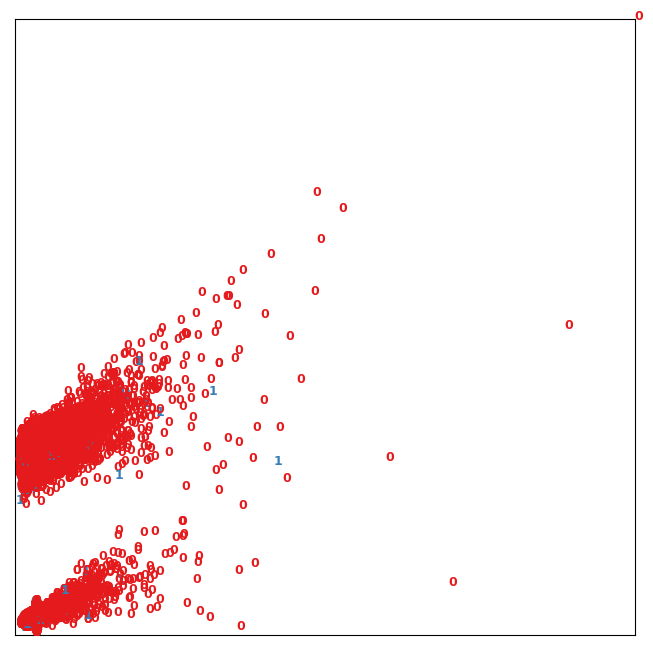

In [25]:
print("Org data dimension is {}. Embedded data dimension is {}".format(X_train_embed.shape[-1], X_train_embed.shape[-1]))
 
'''嵌入空间可视化'''
x_min, x_max = X_train_embed.min(0), X_train_embed.max(0)
X_norm = (X_train_embed - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# TSNE4dimension visualization
# tripet loss to generate seperated-enough data
# MLP by pytorch
# XGboost with 1:1 01 dataset, each batch: 1's and randomly select 0's 

In [29]:
X_train.sample(100)

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v990,v991,v992,v993,v994,v995,v996,v997,v998,v999
22936,0.006864,0.038655,0.011914,5.528423,0.647058,0.004506,226.0,5.0,0.861032,0.554269,...,23.0,0.196058,0.030427,0.088103,0.430966,0.041503,187.0,0.000000,1.435884,0.000000
37725,0.000000,0.000000,0.011914,5.359847,0.343568,0.004506,8.0,0.0,0.995544,0.554269,...,19.0,0.152174,0.008056,0.088103,0.430966,0.014433,64.0,0.000000,1.435884,0.000000
3346,0.006864,0.038655,0.011914,3.930777,0.677843,0.004506,2.0,0.0,0.966228,1.178350,...,0.0,0.000000,0.030427,0.088103,0.430966,0.041503,21.0,0.000000,1.435884,0.000000
24731,0.006864,0.038655,0.011914,4.476189,0.064613,0.004506,52.0,0.0,1.039721,0.554269,...,12.0,0.500000,0.030427,0.088103,0.430966,0.041503,62.0,0.000000,1.435884,0.000000
1273,0.006864,0.038655,0.011914,4.476189,0.343568,0.004506,4.0,2.0,0.525304,0.554269,...,28.0,0.000000,0.030427,0.088103,0.430966,0.041503,40.0,0.081907,1.435884,0.005363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43820,0.006864,0.038655,0.011914,3.736600,0.441077,0.004506,5.0,0.0,0.999954,0.554269,...,0.0,0.196058,0.030427,0.088103,0.430966,0.041503,75.0,0.000000,1.435884,0.000000
19830,0.006864,0.038655,0.011914,4.476189,0.343568,0.004506,1.0,0.0,0.852733,0.554269,...,5.0,0.196058,0.030427,0.088103,0.430966,0.041503,29.0,0.081907,1.435884,0.005363
7389,0.000000,0.038655,0.011914,2.866815,0.343568,0.004506,1.0,0.0,0.980971,0.554269,...,0.0,0.000000,0.030427,0.088103,0.430966,0.041503,8.0,0.000000,1.435884,0.000000
24899,0.006864,0.038655,0.011914,4.969729,0.763855,0.004506,0.0,0.0,0.973720,0.554269,...,0.0,0.000000,0.030427,0.088103,0.430966,0.041503,11.0,0.081907,1.435884,0.005363


In [33]:
y_train = train['DEFAULT_LABEL']
test_f = pd.read_csv("./data/test/feature.csv")
test_l = pd.read_csv("./data/test/label.csv")
test = pd.merge(test_f, test_l)
X_test = test.drop(['APPLICATION_ID', 'APPLICATION_DATE', 'DEFAULT_LABEL'], axis=1)
y_test = test['DEFAULT_LABEL']

In [34]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier(max_depth=20, learning_rate=0.05, n_estimators=200, objective='multi:softmax',num_class=2)
clf_xgb.fit(X_train.sample(len(y_train)), y_train)

train_score = clf_xgb.score(X_train, y_train)
test_score = clf_xgb.score(X_test, y_test)

predict = clf_xgb.predict(X_test)
accuracy = accuracy_score(y_test, predict)
f1_score_macro = f1_score(y_test, predict, average='macro')
f1_score_weighted = f1_score(y_test, predict, average='weighted')
auc = roc_auc_score(y_test, clf_xgb.predict_proba(X_test)[:, 1])

compare_model = pd.DataFrame(data=[["XGBoost", train_score, test_score, accuracy, f1_score_macro, f1_score_weighted, auc]],
                                 columns=['Model', 'Training Accuracy %', 'Testing Accuracy %', 'Accuracy Score', 'F1_Score_Macro',
                                          'F1_Score_Weighted', 'AUC'])
# compare_models = compare_models.append(compare_model_3,ignore_index=True)
compare_model

NameError: name 'accuracy_score' is not defined